# Smart cities: Smart Energy Building


Authors: ELISABET MARINA, RODRIGO SEGOVIA, ÁNGEL BORREGO, KRISTIAN DUPONT and CELIA GASCÓN

## Table of Contents

1. Introduction	
2. Hypothesis	
    2.1. Building plan	
    2.2. Boundary conditions
3. Elements of the thermal network
4. Thermal model definition 
5. Mathematical Model
6. Simulation	
    6.1. State-space Model	
    6.2. Dynamic simulation	
    6.3. Simulation with weather data
7. Results and analysis	
8. Conclusion	


## 1. Introduction

Buildings are responsible for nearly half overall energy consumption. Therefore, energy management strategies that include modelling and control are essential for an overall reduction of energy consumption.

Creating virtual models of buildings through simulations allows us to assess energy flow quite accurately in order to identify key performance indicators without spending money and time on expensive measurements. To develop these simulations we include parameters like the weather, the angle of incidence of the sun, the material of the walls, building geometry, internal heat gains such as lighting, equipment loads and occupants and air conditioning and heating. 

The goal is to analyse, design and simulate a model of an accomodation using a programming language such as MATLAB or Python and discussing the results. 


## 2. Hypothesis

Figure 1 gives the plant and section plans of our modelling case. To carry out the simulation, we consider the following assumptions: 

- Same temperature throughout the surface of a wall.
- Unidimensional heat transfer in each wall. 
- Diffuse solar irradiation distribution inside the accommodation. 
- Heat transfer is considered as a linear phenomena. 
- The LW radiation exchange between outer surfaces and the ground is neglected

![Fig1_BuildingPlan.JPG](Fig1_BuildingPlan.JPG)
                                    Figure 1: Floor plan of the appartement


  ## 2.1. Building plan

Room height: 3m

Height of the door: 2,1m

We suppose the window goes until the floor, all the wall height as it appears in figure 4.

![Fig2_BuildingPlan.JPG](Fig2_BuildingPlan.JPG)
Figure 2: Lengths

Average temperature of the three walls considered for the thermal model: 20ºC

The widths of the concrete and insulation shown on table 2 are per slice and per wall.

![Fig3_BuildingPlan.JPG](Fig3_BuildingPlan.JPG)
Figure 3: Widths

Our concept of glass window (from top to bottom):

![Fig4_BuildingPlan.JPG](Fig4_BuildingPlan.JPG)
Figure 4: Window model

ACH (Air changes per hour), we ventilate the room one time per hour. We understand this by the amount of times we ventilate per hour.
        
       
  

## 2.2. Boundary conditions

Our apartment has the following boundary conditions, in function of the following orientations:

- South: The facade has a total solar exposure
- East:  The wall it has another apartment
- North: Is in contact with the corridor of the building
- West:  The facade is totally on shadow

In our case the appartement that we are studying is just in the corner of a building of apartments with south orientation.


## 3. Elements of the thermal network

The thermal resistances for conduction are of the form:
$$R_{cd} = \frac{w}{\lambda S}$$
where:

- $w$ is the width of the material, m;
- $\lambda$ - thermal conductvity, W/m K;
- $S$ - surface area of the wall, m²

The thermals resistance for convection are of the form:
$$R_{cv} = \frac{1}{h S}$$
where:
- $h$ is the convection coefficient, W/m² K;
- $S$ - surface area of the wall, m².

The thermal capacities of the wall are of the form:
$$C_{wall}= \rho_{wall} c_{p, wall} w_{wall} S_{wall}$$

The thermal capacity of the air is:
$$C_{air} = \rho_{air} c_{air} V_{air}$$

The total shortwave incident irradiation on the wall $i$, $G_i$, may be estimated as a function of the direct solar irradiation incident on the surface of the walls, $G_{i}^{o}$:

$$S_i G_i = S_i G_{i}^{o} + \sum_{j=1}^{n} F_{j,i} S_j \rho_j G_j$$

where:
- $S_i$ is the area of the surface of the wall $i$ [m²];
- $G_i$ - total irradiation received directly and by mutiple reflections on surface $i$ [W/m²];
- $G_{i}^{o}$ - irradiance received directly from the sun on surface $i$ [W/m²];
- $F_{j, i}$ - view factor between surface $j$ and surface $i$, $0 ⩽ F_{j,i} ⩽ 1$;
- $\rho_j$ - reflectivity of surface $j$, $0 ⩽ \rho_j ⩽ 1$.


By taking into account the *reciprocity relation*: $S_i F_{i,j} = S_j F_{j,i}$, the previous equation becomes:

$$
\begin{bmatrix}
1 - \rho_1 F_{1,1} & - \rho_2 F_{1,2}     & ...  & - \rho_n F_{1,n}\\ 
- \rho_1 F_{2,1}   & 1 - \rho_2 F_{2,2}  & ...  & - \rho_n F_{2,n} \\ 
...                         & ...                            & ...  & ... \\ 
- \rho_1 F_{n,1}  & - \rho_2 F_{n,1}      & ... & 1 - \rho_n F_{n,n}
\end{bmatrix} \begin{bmatrix}
G_1\\ 
G_2\\ 
...\\ 
G_n
\end{bmatrix} = \begin{bmatrix}
G_{1}^{o}\\ 
G_{2}^{o}\\ 
...\\ 
G_{n}^{o}
\end{bmatrix}
$$

or

$$[I - \rho F] G = G^o$$

where:

- $I =\begin{bmatrix}
1 & 0 & ... & 0 \\ 
0 & 1 & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & 1 
\end{bmatrix}, $ is the identity matrix;

- $\rho = \begin{bmatrix}
\rho_1 & 0 & ... & 0\\ 
0 & \rho_2  & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & \rho_n 
\end{bmatrix}$ - matrix of reflexivities;

- $F = \begin{bmatrix}
F_{1,1} & F_{1,2} & ... & F_{1,n}\\ 
F_{2,1} & F_{2,2} & ... & F_{2,n} \\ 
... & ... & ... & ...\\ 
F_{n,1} & F_{n,2} & ... & F_{n,n}
\end{bmatrix}$ - matrix of view factors;

- $G = \begin{bmatrix}
G_1\\ 
G_2\\ 
...\\ 
G_n
\end{bmatrix}$ - vector of unknown total irradiances;

- $G^o = \begin{bmatrix}
G_{1}^{o}\\ 
G_{2}^{o}\\ 
...\\ 
G_{n}^{o}
\end{bmatrix}$ - vector of direct solar irradiances.

The unknown total irradiances are then
$$ G = [I - \rho F]^{-1} G^o$$

The radiative short wave (i.e. solar) heat flow rate on each surface is:
$$ \Phi = S G $$
where:
- $\Phi = \begin{bmatrix}
\Phi_1\\ 
\Phi_2\\ 
...\\ 
\Phi_n
\end{bmatrix}$ - vector of total heat flow rates due to solar radiation [W]; 

- $S =\begin{bmatrix}
S_1 & 0 & ... & 0 \\ 
0 & S_2 & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & S_n 
\end{bmatrix}$ - matrix of surface areas of walls $i$ [m²].


## 4. Thermal model definition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

In [2]:
# P-controler gain
Kp = 1e4            # almost perfect controller Kp -> ∞
Kp = 1e-3           # no controller Kp -> 0

The dimension and surface areas of the building are:

In [3]:
Kp = 10

We only define the walls where there will be a heat exchange: indoor corridor, shaded exterior wall, sun exposed exterior wall.

In [4]:
l = 6               # m length of the room
w= 7.3              # m width of the room
h= 3                # height of the ceiling
Sdoor= 0.8*2.1      #surface of the door
Sglass =3.1*h       # m² surface of the glass wall
Sshade= l*h
Ssun=w*h-Sglass
Scorr=w*h-Sdoor
Sconc=Ssun+Sshade+Scorr
Stot=Sglass+Ssun+Sshade+Scorr
Surfaces={'Surface': [Sshade, Ssun, Scorr, Sglass, Sdoor]}
Surfaces=pd.DataFrame(Surfaces, index=['Sshade', 'Ssun', 'Scorr','Sglass', 'Sdoor'])
Surfaces

,Surface
Sshade,18.00
Ssun,12.60
Scorr,20.22
Sglass,9.30
Sdoor,1.68


The building is ventilated; the volumis air flow rate is `Va_dot`: 

In [5]:
Va = l*w*h           # m³ volume of air
ACH = 1             # air changes per hour
Va_dot = ACH * Va / 3600    # m³/s air infiltration

The thermophysical propoerties of air:

In [6]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/kg.K

The thermophysical propoerties of the materials and surface areas of the materials in the wall:

In [7]:
wall = {'Conductivity': [1.4, 0.027, 1.4, 0.17],  # W/m.K
        'Density': [2300, 55, 2500, 630],        # kg/m³
        'Specific heat': [880, 1210, 750, 2380],  # J/kg.K
        'Width': [0.2, 0.08, 0.004, 0.04],
        'Surface': [Sconc, Sconc, Sglass, Sdoor],  # m²
        'Slices': [4, 2, 1, 1]}                # number of discretizations
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass', 'Door'])
wall

,Conductivity,Density,Specific heat,Width,Surface,Slices
Concrete,1.400,2300,880,0.200,50.82,4
Insulation,0.027,55,1210,0.080,50.82,2
Glass,1.400,2500,750,0.004,9.30,1
Door,0.170,630,2380,0.040,1.68,1


Wall thickness:

In [8]:
w_conc=0.2
w_ins=0.08
w_glass=0.004
w_door=0.04

Density:

In [9]:
rho_c = 2300
rho_i = 55
rho_g = 2500
rho_a = 1.2
rho_d = 630

Heat capacity:

In [10]:
Cp_a = 718 #J/(kgK)
Cp_c = 1000 #J/(kgK)
Cp_g = 840 #J/(kgK)
Cp_i = 700 #J/(kgK)
Cp_d = 1160 #J/(kgK)

The radiative properties of the surfaces are:

In [11]:
ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity

σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant

The view factor between the wall and the window (glass) will not be considered for the time being. 

The mean temperature of the surfaces (used for the linearizatio of the radiative heat exchange) is:

In [12]:
Tm = 20 + 273   # mean temp for radiative exchange

Convection coeficients:

In [13]:
# convection coefficients, W/m² K
h_in = 4
h_out = 10

Thermal conductivities:

In [14]:
lam_conc=1.4
lam_ins=0.027
lam_glass=1.4
lam_door=0.17

###### **Thermal circuit**
![Fig5_ThermalCircuit.JPG](Fig5_ThermalCircuit.JPG)

## 5. Mathematical Model

The thermal circuit is discribed by the diferential-algebraic set of equations:

$$C \dot{\theta} = -(A^T G A) \theta + A^T G b + f$$
$$q = G (-A \theta + b)$$

where:
- **A** incidence matrix: shows how the temperature nodes are conected by branches of heat flow. It consists of $n_q$ rows and $n_{\theta}$ columns, where $n_q$ is the number of flow branches and $n_{\theta}$  is the number of temperature nodes. If flow *m* enters  into the node *n*, then the element (*m, n*) is 1; if flow *m* exits from the node *n*, then the element (*m, n*) is -1; if flow *m* is not conected to node *n*, then the element (*m, n*) is 0.

- **G** conductance matrix: diagonal matrix containing the conductances. Its size is It consists of $n_q \times n_q$,  where $n_q$ is the number of flow branches.

- **b** temperature source vector: if there is no temperature source on the branch *m*, then $b_m = 0$.

- **C** capacity matrix: diagonal matrix containing the capacities. If there is no capacity in the node *n*, then $C_{n, n} = 0$.

- **f** heat flow source vector: if there is no heat flow source in the node *n*, then $f_n = 0$.


**Incidence matrix**

In [15]:
A = np.zeros([23, 17])
A[0, 0] = 1
A[1, 0] = -1
A[1, 1] = 1
A[2, 1] = -1
A[2, 2] = 1
A[3, 2] = -1
A[3, 3] = 1
A[4, 3] = -1
A[5, 4] = 1
A[6, 4] = -1
A[6, 5] = 1
A[7, 5] = -1
A[7, 6] = 1
A[8, 6] = -1
A[8, 7] = 1
A[9, 7] = -1
A[10, 8] = 1
A[4, 14] = 1
A[9, 14] = 1
A[11, 8] = -1
A[11, 9] = 1
A[12, 9] = -1
A[12, 10] = 1
A[13, 10] = -1
A[13, 11] = 1
A[14, 11] = -1
A[14, 14] = 1
A[15, 12] = 1
A[16, 12] = -1
A[16, 13] = 1
A[17, 13] = -1
A[17, 14] = 1
A[18, 14] = 1
A[19, 14] = 1
A[20, 15] = 1
A[21, 15] = -1
A[21, 16] = 1
A[22, 14] = 1
A[22, 16] = -1

np.set_printoptions(suppress=False)
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Conductance matrix**

In [16]:
G = np.zeros([23, 23])

# Convection

G[0, 0] = h_in*Scorr
G[5, 5] = h_out*Sshade
G[10, 10] = h_out*Ssun
G[15, 15] = h_out*Sglass
G[20, 20] = h_in*Sdoor

# Conduction 

# Corridor
G[1, 1] = 2*lam_conc*Scorr/w_conc
G[2, 2] = 2*lam_conc*Scorr/w_conc
G[3, 3] = 2*lam_ins*Scorr/w_ins
G[4, 4] = 2*lam_ins*Scorr/w_ins
# Shaded wall
G[6, 6] = 2*lam_conc*Sshade/w_conc
G[7, 7] = 2*lam_conc*Sshade/w_conc
G[8, 8] = 2*lam_ins*Sshade/w_ins
G[9, 9] = 2*lam_ins*Sshade/w_ins
# Sunny wall
G[11, 11] = 2*lam_conc*Ssun/w_conc
G[12, 12] = 2*lam_conc*Ssun/w_conc
G[13, 13] = 2*lam_ins*Ssun/w_ins
G[14, 14] = 2*lam_ins*Ssun/w_ins
# Window
G[16, 16] = 2*lam_glass*Sglass/w_glass
G[17, 17] = 2*lam_glass*Sglass/w_glass
# Door
G[21, 21] = 2*lam_door*Sdoor/w_door
G[22, 22] = 2*lam_door*Sdoor/w_door

pd.DataFrame(G)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,80.88,0.00,0.00,0.0000,0.0000,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,0.00,283.08,0.00,0.0000,0.0000,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,0.00,0.00,283.08,0.0000,0.0000,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,0.00,0.00,0.00,13.6485,0.0000,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,0.00,0.00,0.00,0.0000,13.6485,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
5,0.00,0.00,0.00,0.0000,0.0000,180.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
6,0.00,0.00,0.00,0.0000,0.0000,0.0,252.0,0.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
7,0.00,0.00,0.00,0.0000,0.0000,0.0,0.0,252.0,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
8,0.00,0.00,0.00,0.0000,0.0000,0.0,0.0,0.0,12.15,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
9,0.00,0.00,0.00,0.0000,0.0000,0.0,0.0,0.0,0.00,12.15,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


**Capacity matrix**

In [17]:
C = np.zeros([17,17])
C[1,1] = Scorr*w_conc*rho_c*Cp_c
C[3,3] = Scorr*w_ins*rho_i*Cp_i
C[5,5] = Sshade*w_conc*rho_c*Cp_c
C[7,7] = Sshade*w_ins*rho_i*Cp_i
C[9,9] = Ssun*w_conc*rho_c*Cp_c
C[11,11]= Ssun*w_ins*rho_i*Cp_i
C[13,13]= Sglass*w_glass*rho_g*Cp_g
C[14,14]= Va*rho_a*Cp_a
C[16,16]= Sdoor*w_door*rho_d*Cp_d

pd.DataFrame(C)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,0.0,9301200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
3,0.0,0.0,0.0,62277.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
5,0.0,0.0,0.0,0.0,0.0,8280000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5796000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


**Input vector**

The vector of *temperature sources* is **b**. It has the size of the number of branches and it's element corresponding to a branch without a source is zero. If the flow in a source is from low potential to high potential (i.e. from - to +), the source is positive [🔗](https://en.wikipedia.org/wiki/Passive_sign_convention) . Let's give some arbitrary non-zero values to the temperature sources:

In [18]:
T_out = 20
T_in = 22
T_corr = 18

b = np.zeros(23)
b[[0, 5, 10, 15, 18, 19, 20]] = np.array([T_corr, T_out, T_out, T_out, T_out, T_in, T_corr])

pd.DataFrame(b)

,0
0,18.0
1,0.0
2,0.0
3,0.0
4,0.0
5,20.0
6,0.0
7,0.0
8,0.0
9,0.0


The vector of *heat sources* is **f**. It has the size of the number of nodes (in this example 8) and its element corresponding to a node without a heat source is zero. Let's give some arbitrary non-zero values to the heat sources:

In [19]:
f = np.zeros(17)
f[[0, 4, 8, 12, 14, 15]] = 1000 + np.array([0, 3000, 4000, 5500, 6500, 8500])
pd.DataFrame(f)

,0
0,1000.0
1,0.0
2,0.0
3,0.0
4,4000.0
5,0.0
6,0.0
7,0.0
8,5000.0
9,0.0


The vector of outputs is **y**. It has the size of the number of nodes (in this example 8). The non-zero values of **y** indicate the nodes that are the outputs of the model. Let's assume that all temperatures are of interest:

In [20]:
y = np.ones(17)

The inputs vector **u** is:

$$\mathbf{u} = \begin{bmatrix}
\mathbf{b}\\ 
\mathbf{f}
\end{bmatrix}$$

where **b** is  the vector of temperature sources and **f** the vector of heat flow sources. Note that in Python, a vector is a row. The **u** vector is obtained as an horizontal stack of the sources that are in the circuit (non-zero elements of **b** and **f**):

In [21]:
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])
pd.DataFrame(u)

,0
0,18.0
1,20.0
2,20.0
3,20.0
4,20.0
5,22.0
6,18.0
7,1000.0
8,4000.0
9,5000.0


### 6.1. State-space model

The [state-space representation](https://en.m.wikipedia.org/wiki/State-space_representation) of the dynamic model is obtained from the differential-algebraic set of equations:

In [22]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

Let's compare the steady state results obtained with the differential-algebraic equations of the thermal circuit:
$$y_{tc} = (A^T G A)^{-1}(A^T G b + f)$$
and the state-space:
$$y_{ss} = (-C_s A_s^{-1} B_s + D_s) u$$ 

In [23]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'Max error in steady-state between thermal circuit and state-space:\
 {max(abs(yss - ytc)):.2e}')

[ 42.558  46.042  49.526 121.788  46.958  50.341  53.724 123.887  63.874
  66.868  69.862 131.956 191.157 192.604 194.05  794.118 494.084]
[ 42.558  46.042  49.526 121.788  46.958  50.341  53.724 123.887  63.874
  66.868  69.862 131.956 191.157 192.604 194.05  794.118 494.084]
Max error in steady-state between thermal circuit and state-space: 2.26e-11


### 6.2. Dynamic simulation

In dynamic simulation, the inputs vary in time. Let's indicate the sources in the circuit by ones:

In [24]:
b = np.zeros(23)
b[[0, 5, 10, 15, 18, 19, 20]] = 1

f = np.zeros(17)
f[[0, 4, 8, 12, 14, 15]] = 1

Let's consider that the output of the circuit is the indoor temperature (i.e. the temperature of node 6):

In [25]:
y = np.zeros(17)
y[[15]] = 1

The state-space representation is obtained from the differential-algebraic equations of the thermal circuit:

In [26]:
[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)

In [27]:
Ds.shape

(1, 13)

### Time step

The maximum time step for numerical stability of Euler explicit itegration in time is given by the minimum eigenvalue $\lambda$ of the state matrix $A_s$:

$$ \Delta t \leq \min (-2 / \lambda_i) = \min T_i/2$$

where $T_i$ is the time constants, $T_i = - \frac{1}{\lambda_i} $

In [28]:
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

Maximum time step: 14.11 s


The maximum time step for numerical stability of Euler explicit integration in time depends on the value of the P-controller gain and if the capacities of the indoor air and window glass are taken into account. 

For example
- if `Kp = 1e4` (i.e. powerful P-controller) and `C = np.diag([0, C['Concrete'], 0, C['Insulation'], 0, 0, C['Air'], C['Glass']])`, the maximum time step is `6.42 s`.
- if `Kp = 1e-3` (i.e. practically free floating building) and `C = np.diag([0, C['Concrete'], 0, C['Insulation'], 0, 0, 0, 0])`, the maximum time step is `10029.45 s`.

Let's chose a time step smaller than `dtmax`:

In [29]:
# dt = 5
dt = 12

### Step response

Let's obtain the dynamic response of the system to a step input. For the duration of simulation:

In [30]:
duration = 3600 * 24 * 3  #3 days duration [s]
duration

259200

the number of steps is

In [31]:
n = int(np.floor(duration / dt))
n

21600

The time vector (with time step `dt`) is

In [32]:
t = np.arange(0, n * dt, dt)    # time
t

array([     0,     12,     24, ..., 259164, 259176, 259188])

For the input vector **u**, the outdoor temperatures will be `To = 1`, the indoor set-point temperature will `Tsp =0`, and the heat flow sources will be zero. 

In [33]:
# Vectors of state and input (in time)
n_tC = As.shape[0]              # number of state variables (temps with capacity)
# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([13, n])
u[0:6, :] = np.ones([6, n]) #6 for every point where we have T_out
pd.DataFrame(u)

,0,1,2,3,4,5,6,7,8,9,...,21590,21591,21592,21593,21594,21595,21596,21597,21598,21599
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The vectors for the evolution of **tem**peratures (states) in time for Euler **exp**licit and **imp**licit are:

In [34]:
temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

By integrating the state-space model
$$\left\{\begin{array}{rr}
\dot{\theta}=A_s \theta + B_s u\\ 
y = C_s \theta + D_s u
\end{array}\right.$$
by using Euler forward (or explicit)
$$ \theta_{k+1} = (I + \Delta t A) \theta _k + \Delta t B u_k $$
and Euler backward (or implicit) integration
$$\theta_{k+1} = (I - \Delta t A)^{-1} ( \theta _k + \Delta t B u_k )$$

In [35]:
I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

we obtain the outputs

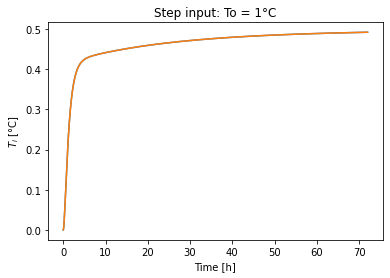

In [36]:
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()

### 6.3 Simulation with weather data

Read the hourly weather data file from start date to end date. The data are for a year (the choice of 2000 for the year is arbitrary).

In [37]:
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = dm4bem.read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

From weather data, calculate the hourly solar radiation on a tilted surface, `Φt1` [W]:

In [38]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = dm4bem.sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

The weather data is at the time-step of 1h. It needs to be at time step of `dt`. 

In [39]:
data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
data = data.resample(str(dt) + 'S').interpolate(method='linear')
data = data.rename(columns={'temp_air': 'To'})

Let's consider the indoor temperature setpoint `Ti` and auxiliary heat flow `Qa` constant for the whole simulation period.

In [40]:
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

The simulation time vector, at time step `dt`is:

The input vector is formed by the temperature sources $\left [ T_o, T_o ,T_o, T_{i,sp} \right ]$ and the heat flow sources $\left [ \Phi_o, \Phi_i, \dot{Q_a}, \Phi_a \right ]$

In [41]:
t = dt * np.arange(data.shape[0])

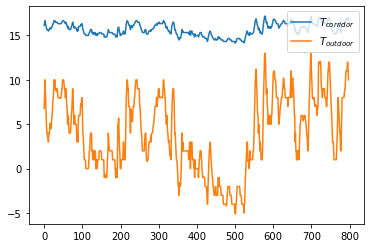

In [42]:
data['Tcorr'] = 18 + (data['To']-18)*3/18
data['Φindoor'] = 50

plt.plot(t/3600, data['Tcorr'], label='$T_{corridor}$')
plt.plot(t/3600, data['To'], label='$T_{outdoor}$')
plt.legend(loc='upper right')

**Since we now have dynamic data, we use this dynamic data to make a simple, but improved model of the corridor temperatur, as can be seen in the graph above. We the initiate the u-vector as done below, assuming that the irradiation on the shaded wall on average is 0.3 times the irradiation on the sunny wall.**

In [43]:
u = pd.concat([data['Tcorr'], data['To'], data['To'], data['To'], data['Tcorr'], data['To'], data['Ti'],
               α_wSW * Scorr * data['Φindoor'],
               α_wSW * Ssun * data['Φt1'],
               α_wSW * Sshade * data['Φt1']*0.3,
               α_gSW * Sglass* data['Φt1'],
               #τ_gSW * α_wSW * wall['Surface']['Glass'] * data['Φt1'],
               data['Qa'],
               α_gSW * Sdoor * data['Φindoor']], axis=1)

The initial value of the state-vector can be different of zero:

In [44]:
temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])
u.iloc[1,:]


Tcorr       16.134000
To           6.804000
To           6.804000
To           6.804000
Tcorr       16.134000
To           6.804000
Ti          20.000000
Φindoor    202.200000
Φt1        249.961324
Φt1        107.126282
Φt1         92.247632
Qa           0.000000
Φindoor      8.400000
Name: 2000-01-03 12:00:12+01:00, dtype: float64

Explicit Euler integration in time
$$ \theta_{k+1} = (I + \Delta t A) \theta _k + \Delta t B u_k $$

In [45]:
for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k] + dt * Bs @ u.iloc[k, :]

yields the time variation of state variable $\theta$, from which we obtain the variation of the output (i.e. indoor temperature):
$$y = C_s \theta + D_s u$$
and the variation of the heat flow of the HVAC system:
$$q_{HVAC} = K_p (T_{i,sp} - y)$$
where $K_p$ is the gain of the P-controller and $T_{i,sp}$ is the HVAC-setpoint for the indoor temperature.

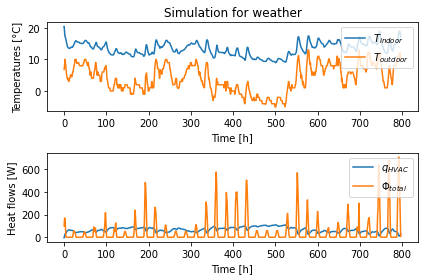

In [46]:
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

**For our dynamic model, we have choosen a Kp of 10, which is reflected in the qHvac graph in the lower subplot. we see that the indoor temperature follows the outdoor teperature well, but is consistenly higher, and closer to the desired 20 degrees than the outdoor temperature.**

## Discussion

The time step depends on:

- P-controller gain `Kp`:
    - if $K_p \rightarrow \infty$, then the controller is perfect and the time step needs to be small;
    - if $K_p \rightarrow 0$, then,the controller is inefffective and the building is in free-running.
- Capacities considered into the model:
    - if the capacities of the air $C_a =$ `C['Air']` and $C_g =$ `C['Glass']`are considered, then the time step is small;
    - if the capacities of the air and of the glas are zero, then the time step is large.

The controller models an HVAC system capable to heat (when $q_{HVAC} > 0$) and to cool $q_{HVAC} < 0$).

**References**

C. Ghiaus (2013) Causality issue in the heat balance method for calculating the design heating and cooling loads, *Energy* 50: 292-301, https://doi.org/10.1016/j.energy.2012.10.024